# Eerste demo Lloyd's algoritme

- Auteur: Jimmy Bierenbroodspot
- Datum: 17 juni 2024
- Locatie: Hogeschool Utrecht

In dit document zullen we kijken naar hoe het model presteert op 
twee-dimensionale datasets. Vervolgens zullen we kijken of het model correct de
juiste kolommen in een pdf-bestand weet te identificeren.

## Demo

In [136]:
import sys
sys.path.append("../")

import numpy as np
import numpy.typing as npt
from matplotlib import pyplot as plt
import pypdf

from src.algorithm.clustering import ClusteringModel

Om te kijken of ons model werkt hebben we eerst een dataset nodig waar we 
clusters in kunnen herkennen. [Hier](https://stackoverflow.com/a/54247969) zien
we een voorbeeld van hoe dit kan door enkel `numpy` te gebruiken.

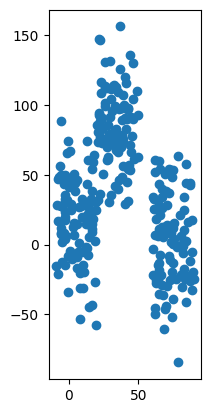

In [137]:
center_one: tuple[int, int] = (-10, 15)
center_two: tuple[int, int] = (20, 80)
center_three: tuple[int, int] = (60, 10)
distance: int = 30

demo_dataset: npt.NDArray[np.int64] = np.array([
    [
        *np.random.uniform(center_one[0], center_one[0] + distance, size=(100,)),
        *np.random.uniform(center_two[0], center_two[0] + distance, size=(100,)),
        *np.random.uniform(center_three[0], center_three[0] + distance, size=(100,)),
    ],
    [
        *np.random.normal(center_one[1], distance, size=(100,)),
        *np.random.normal(center_two[1], distance, size=(100,)),
        *np.random.normal(center_three[1], distance, size=(100,)),
    ],
]).T

plt.scatter(x=demo_dataset[:,0], y=demo_dataset[:,1]) # type: ignore
plt.gca().set_aspect("equal", adjustable="box")

plt.show() # type: ignore

Vervolgens trainen we het model met de data, we zien nu drie clusters dus we
zullen het model ook aangeven om 3 clusters te gebruiken.

In [138]:
model: ClusteringModel[np.int64] = ClusteringModel(demo_dataset, 3, "lloyds")
model.train(demo_dataset)

We tonen nu de clusters die gevonden zijn.

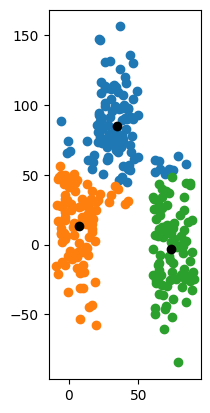

In [139]:
for cluster in range(model.num_clusters):
    subset: npt.NDArray[np.int64] = demo_dataset[
        model.closest_centers == cluster
    ].T

    plt.scatter(*subset) # type: ignore

plt.scatter(*model.cluster_centers.T, color="black") # type: ignore
plt.gca().set_aspect("equal", adjustable="box")

plt.show() # type: ignore

Dit ziet er op eerste zicht redelijk uit. We kunnen nu kijken hoe dit zou werken
op een echt `.pdf`-document.

We hebben een voorbeeld CV die we zullen inladen met de tekstopmaak bewaard.`

In [140]:
pdf_reader: pypdf.PdfReader = pypdf.PdfReader("../pdf/voorbeeld_aicv_cv.pdf")
pdf_text: str = pdf_reader.pages[0].extract_text(extraction_mode="layout")
print(pdf_text)

          DRIE TREFWOORDEN +                                                                        ERVARING
    PERSOONSOMSCHRIJVING                                                                            F   u   n   ctietitel + b   ij + Bed   rijf
               Re   g   io    [WOONPL   AATS]                                                       sta   rtma   a   n   d    sta   rtja   a   r - e   in   d   ma   a   n   d    e   in   d   ja   a   r
                                                                                                    [Me   e   st e   ffe   ctie   ve    zin    va   n    h   e   t h   e   le    CV, ko   rt, kra   ch   tig   , h   e   e   l
                                                                                                    e   rg    p   a   sse   n   d    b   ij d   e    va   ca   tu   re   .]
                                 DRI   VE                                                           F   u   n   ctietiel + b   ij + Bed   rijf
    [TE

Om ervoor te zorgen dat we ons model hierop kunnen trainen moeten we dit 
tekststuk om weten te zetten naar een dataset. Om dit te doen itereren we over
elke regel en onthouden we de index als de y-positie en vervolgens over elk 
karakter in deze regel en onthouden we de index als de x-positie. Dit doen we
vervolgens voor elk karakter.

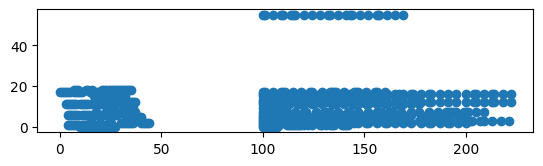

In [141]:
character_position_list: list[tuple[int, int]] = []

for y, line in enumerate(pdf_text.splitlines()):
    for x, char in enumerate(line):
        if not char.isspace():
            character_position_list.append((x, y))

character_positions: npt.NDArray[np.int64] = np.array(character_position_list)

plt.scatter(x=character_positions[:,0], y=character_positions[:,1]) # type: ignore
plt.gca().set_aspect("equal", adjustable="box")

plt.show() # type: ignore

Voor nu trainen we het model met 2 als het aantal clusters. In de toekomst
willen we dat het model zelf de optimale aantal clusters vindt.

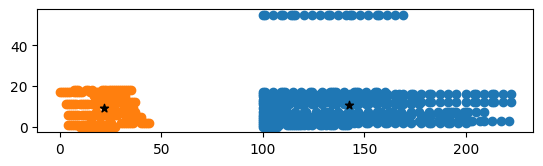

In [142]:
model = ClusteringModel(character_positions, 2, "lloyds")
model.train(character_positions)
plt.scatter(*character_positions[model.closest_centers == 0].T) # type: ignore
plt.scatter(*character_positions[model.closest_centers == 1].T) # type: ignore
plt.scatter(*model.cluster_centers.T, color="black", marker="*") # type: ignore
plt.gca().set_aspect("equal", adjustable="box")
plt.show() # type: ignore

We zien dat het model, in dit geval, de kolommen juist weet te identificeren. We
zien hier wel in het geval dat er een groot leeg stuk in het document zit dat
dit kan leiden tot iets dat geïdentificeerd kan worden als een extra cluster.
Dit is iets dat we willen voorkomen. We zouden dit kunnen doen door bijvoorbeeld
regels waar niks op staat te kunnen verwijderen. 

## Conclusie

We hebben geconcludeerd dat het model correct de twee kolommen in een CV met 2
kolommen weet te identificeren. Dit is echter getest op 1 enkel document waar
de kolommen duidelijk zichtbaar zijn. We kunnen de volgende verbeterpunten
opstellen:

- Maak een anonieme dataset van de beschikbare PDFs waar het aantal kolommen al
geïdentificeerd is.
- Zorg ervoor dat lege regels uit de datasets worden verwijderd.

## Vervolg

In het vervolg zullen we aan de volgende onderdelen werken:

- De elleboog methode.
- Dataset met geïdentificeerde kolommen maken.